In [1]:
import pandas as pd
import matplotlib.pyplot as plt  


1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [2]:
ncc_df=pd.read_excel('C:\\Users\\emmal\\Documents\\NSS\\Projects\\advanced-pandas-emmydoore\\data\\Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')

In [3]:
ncc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


2. **Most Common Causes of Death.**  

In [4]:
#   a. Find the 10 most common (known) recorded causes of death.
#note: found that tilde ~ in front of df means NOT  
#https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

#ran: ncc_df['Cause of Death/Burial'].value_counts().head(10) --> Need to fix 'Unknown' 'Not Known'
total_death=ncc_df[~ncc_df['Cause of Death/Burial'].isin(['Unknown','Not Known'])]
total_death['Cause of Death/Burial'].value_counts().head(10)

Cause of Death/Burial
Consumption     1767
Still Born       841
Cholrea          667
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Cold             421
Teething         411
Name: count, dtype: int64

In [5]:
# b. Clean up some of the misspellings. 
# Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".
total_death=total_death.replace({'Cause of Death/Burial' : {'Cholrea':'Cholera','Still Born':'Stillborn'}})
td_df=total_death['Cause of Death/Burial'].value_counts().head(10)
print(td_df)

Cause of Death/Burial
Consumption      1767
Cholera          1242
Stillborn         926
Old Age           604
Pneumonia         516
Flux              469
Complication      446
Cold              421
Teething          411
Typhoid Fever     310
Name: count, dtype: int64


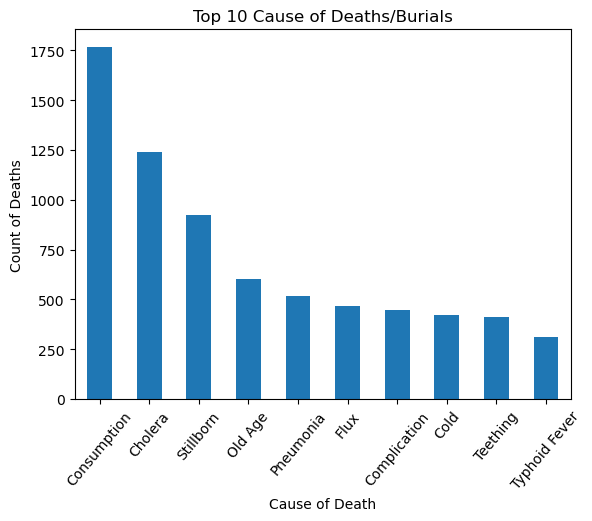

In [6]:
  # c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.
td_df.plot.bar(x='Cause of Death/Burial')
plt.title('Top 10 Cause of Deaths/Burials')
plt.xlabel('Cause of Death')
plt.ylabel('Count of Deaths')
plt.xticks(rotation = 50);

**Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings. 

3. Create a line chart showing the number of burials per year.


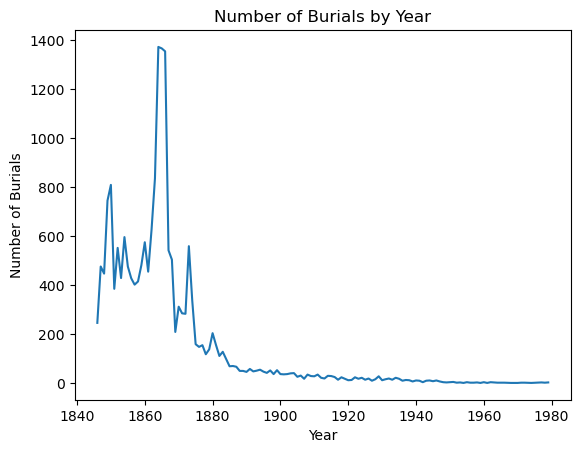

In [28]:
burial_count=ncc_df['Burial Year'].value_counts().sort_index()
burial_count.plot(kind= 'line')
plt.ylabel('Number of Burials')
plt.xlabel('Year')
plt.title('Number of Burials by Year');


4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?


In [31]:
#a.
pd.crosstab(ncc_df['Burial Year'],ncc_df['Burial Month'])

Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
1846.0,22,0,30,26,20,0,0,25,26,23,39,35
1847.0,35,61,34,34,43,40,47,38,26,36,47,35
1848.0,37,39,27,36,36,65,47,49,41,21,26,23
1849.0,43,36,33,64,46,96,231,64,62,24,18,28
1850.0,29,52,31,26,24,370,120,43,37,28,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...
1972.0,1,0,0,0,0,0,0,0,0,0,0,0
1974.0,0,0,0,0,0,0,0,0,0,1,0,0
1977.0,0,0,0,0,0,0,0,1,1,1,0,0


In [ ]:
#b.
ncc_df['Burial Year']=ncc_df['Burial Year'].astype(int)
m=ncc_df
pd.crosstab(ncc_df['Burial Year'],ncc_df['Burial Month'])
sort_index(axis=1, ascending=False)

5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.


### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?


7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?


8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.